# Obtain a map with the expected resolution at every lat/lon location

## The 'doughnut' family of resolution profiles

In [1]:
from vtxmpasmeshes.mesh_generator import doughnut_variable_resolution
import matplotlib.pyplot as plt
import numpy as np

Default Parameters:
{'lowresolution': 25, 'highresolution': 3, 'size': 40, 'margin': 100, 'final_res_dist': 1000, 'radius': 140, 'buffer': 250, 'border': 390}


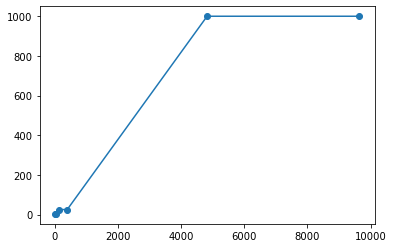

In [2]:
grid = 'doughnut'

# my default resolution style is called 'doughnut'

dists, resol, attrs = doughnut_variable_resolution()

# The shape has a constant inner circle at high resolution, linear increase of resolution, 
# and a low resolution ring followed by a "crazy" increase of resolution outside the 
# region we want to focus in

print('Default Parameters:')
print(attrs)

plt.scatter(dists, resol)
plt.plot(dists, resol)
plt.show()

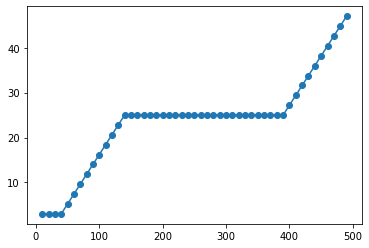

In [3]:
# We can then find the resolution corresponding to any distance, to obtain a more detailed plot

from vtxmpasmeshes.mesh_generator import apply_resolution_at_distance

example_dists = np.arange(10, 500, 10)
# we pass the distances where we want to interpolate (linearly) the distance/resolution pairs 
# that were the output of the doughnut_variable_resolution() function (ie, dists and resol)
result_resolution = apply_resolution_at_distance(example_dists, dists, resol)

plt.scatter(example_dists, result_resolution)
plt.plot(example_dists, result_resolution)
plt.show()

## Personalizing 'doughnut' resolution profiles

Custom Parameters
[   0.          100.          200.          500.         3844.82758621
 7689.65517241]
[   1    1   30   30 1000 1000]
{'highresolution': 1, 'lowresolution': 30, 'size': 100, 'margin': 100, 'final_res_dist': 1000, 'radius': 200, 'buffer': 300, 'border': 500}
Plot in a specific range


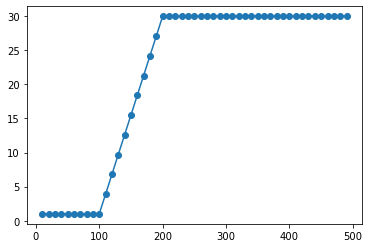

In [4]:
print('Custom Parameters')

dists2, resol2, attrs2 = doughnut_variable_resolution(highresolution=1, lowresolution=30, size=100, margin=100)

print(dists2)
print(resol2)
print(attrs2)

print('Plot in a specific range')

example_dists = np.arange(10, 500, 10)
result_resolution = apply_resolution_at_distance(example_dists, dists2, resol2)

plt.scatter(example_dists, result_resolution)
plt.plot(example_dists, result_resolution)
plt.show()

## Generating a latlon map with the resolution computed from the distance from a certain reference point


>> Creating a variable resolution map
	Resolution in km of lat/lon grid: 10.0
	Computing the distance to the reference point (-30.00, -100.00)
	Computing resolutions using technique doughnut
<xarray.Dataset>
Dimensions:     (lat: 1981, lon: 3961)
Coordinates:
  * lat         (lat) float64 -90.0 -89.91 -89.82 -89.73 ... 89.82 89.91 90.0
  * lon         (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Data variables:
    distance    (lat, lon) float64 6.668e+03 6.668e+03 ... 1.334e+04 1.334e+04
    resolution  (lat, lon) float64 1e+03 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
Attributes:
    lat_ref:         -30
    lon_ref:         -100
    lowresolution:   25
    highresolution:  3
    size:            40
    margin:          100
    final_res_dist:  1000
    radius:          140
    buffer:          250
    border:          390

Direct plots


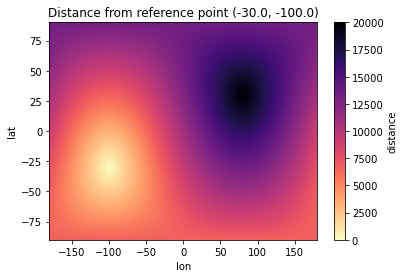

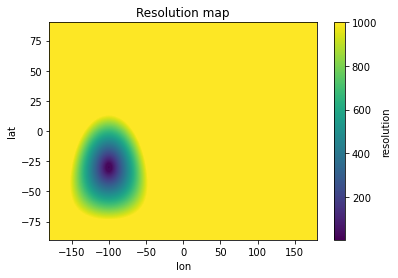

In [5]:
from vtxmpasmeshes.mesh_generator import variable_resolution_latlonmap

# We can generate a global resolution latlon map centered at the reference point:
lat_ref=-30
lon_ref=-100
ds = variable_resolution_latlonmap('doughnut', lat_ref=lat_ref, lon_ref=lon_ref)

print(ds)
    
print('\nDirect plots')
ds['distance'].plot(cmap='magma_r')
plt.title('Distance from reference point (%.1f, %.1f)' % (lat_ref, lon_ref))
plt.show()


ds['resolution'].plot()
plt.title('Resolution map')
plt.show()

## Making nice plots of the resolution maps

{'highresolution': 3, 'lowresolution': 20, 'size': 30, 'margin': 80, 'lat_ref': 51.0, 'lon_ref': -5.0}

>> Creating a variable resolution map
	Resolution in km of lat/lon grid: 3.0
	Computing the distance to the reference point (51.00, -5.00)
	Computing resolutions using technique doughnut
<xarray.Dataset>
Dimensions:     (lat: 6601, lon: 13201)
Coordinates:
  * lat         (lat) float64 -90.0 -89.97 -89.95 -89.92 ... 89.95 89.97 90.0
  * lon         (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    distance    (lat, lon) float64 1.567e+04 1.567e+04 ... 4.334e+03 4.334e+03
    resolution  (lat, lon) float64 1e+03 1e+03 1e+03 1e+03 ... 875.1 875.1 875.1
Attributes:
    highresolution:  3
    lowresolution:   20
    size:            30
    margin:          80
    lat_ref:         51.0
    lon_ref:         -5.0
    final_res_dist:  1000
    radius:          110
    buffer:          200
    border:          310

Direct plot


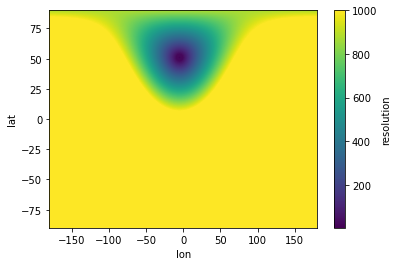


Cartopy plots with km limits
	 .. plotting for distances <= 3000km


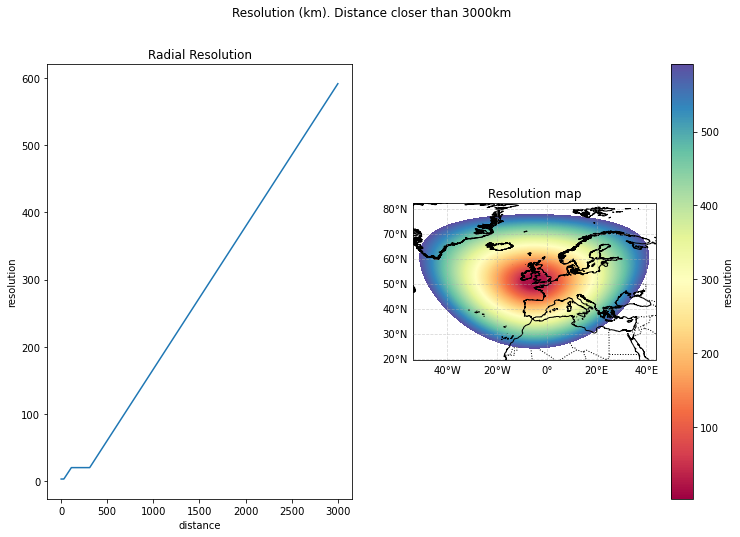

	 .. plotting for distances <= 1000km


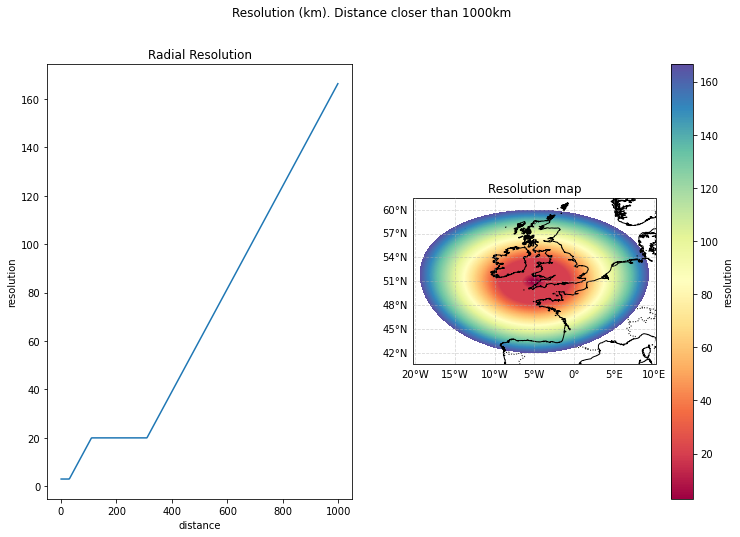

	 .. plotting for distances <= 500km


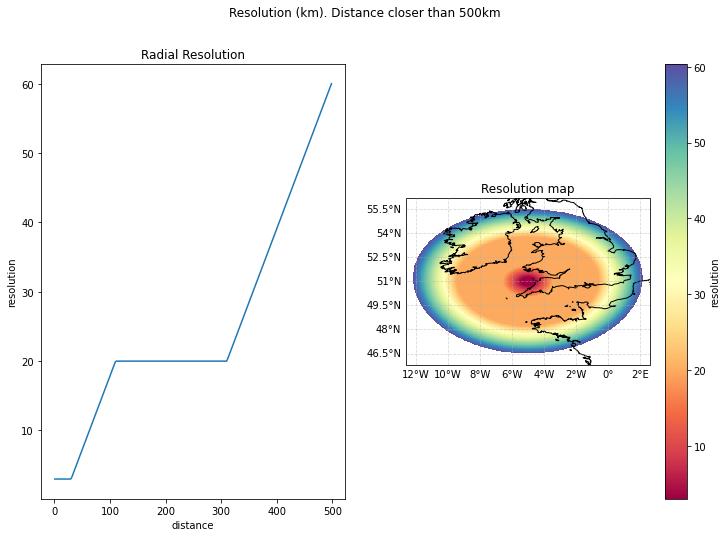

	 .. plotting for distances <= 310km


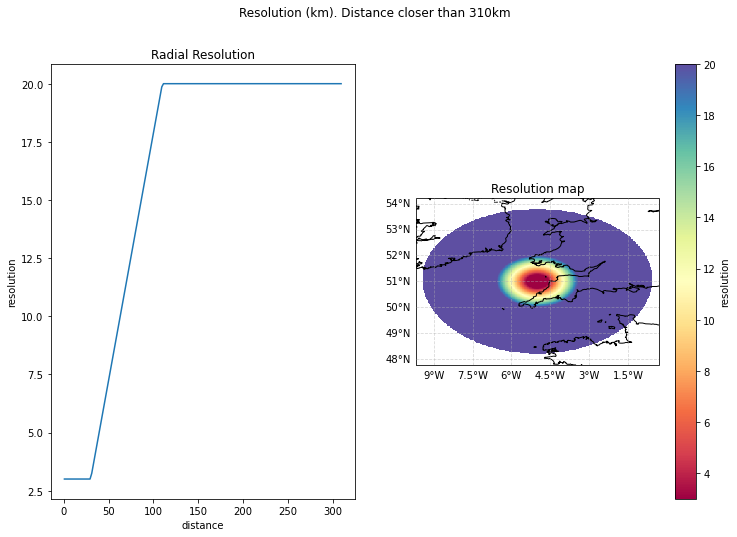

	 .. plotting for distances <= 110km


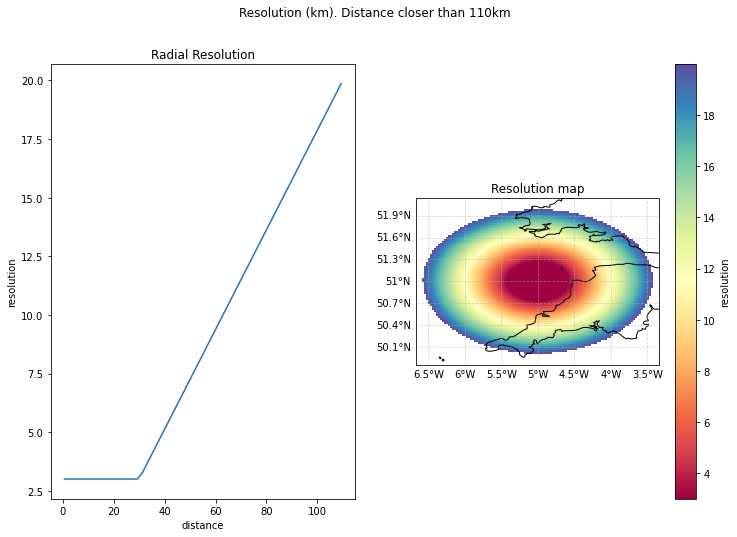

In [6]:
from vtxmpasmeshes.mpas_plots import view_resolution_map

test = {'highresolution': 3, 'lowresolution': 20, 'size': 30, 'margin': 80, 'lat_ref': 51., 'lon_ref': -5.}

print(test)
ds = variable_resolution_latlonmap(grid, **test)
print(ds)

print('\nDirect plot')
ds['resolution'].plot()
plt.show()
plt.title('Resolution map')

# those are nicer plots
print('\nCartopy plots with km limits')
view_resolution_map(ds, list_distances=[3000, 1000, 500, ds.attrs['border'], ds.attrs['radius']])